In [28]:
#from skimage.measure import structural_similarity
from skimage.metrics import structural_similarity as ssim
#from skimage import measure
import imutils
import cv2
from PIL import Image
import requests
import os

if not os.path.exists("pan_card_tampering"):
    os.mkdir("pan_card_tampering")

if not os.path.exists("pan_card_tampering/image"):
    os.mkdir("pan_card_tampering/image")

In [29]:
original = Image.open(r"C:\Users\vtest\OneDrive\Desktop\DataScience BootCamp\PersonalProjects\IDCardDetectionProject\pan_card_tampering\Ehliyet01.jpg")
tampered = Image.open(r"C:\Users\vtest\OneDrive\Desktop\DataScience BootCamp\PersonalProjects\IDCardDetectionProject\pan_card_tampering\image\NijmegenID.jpg")

In [30]:
# The File format of the source file
print("Original image Format :", original.format)
print("Original image Format :", tampered.format)

# Image size, in pixels. THe size is given as a 2-tupke (width, height)
print("Original image size :", original.size)
print("Original image size :", tampered.size)

Original image Format : JPEG
Original image Format : JPEG
Original image size : (825, 521)
Original image size : (1024, 643)


In [31]:
# Resize image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/Original.jpg') #Save image
tampered = tampered.resize((260,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #save image

(250,160)
(250,160)


(250, 160)
(260, 160)


(250, 160)

In [24]:
#Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.jpg')

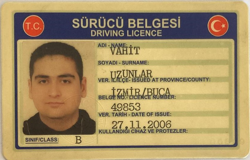

In [32]:
#Display original
original

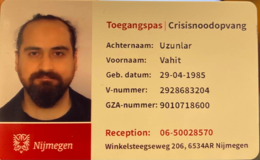

In [33]:
#Display Tempered image
tampered

In [50]:
# load the two input images
original = cv2.imread(r'C:\Users\vtest\OneDrive\Desktop\DataScience BootCamp\PersonalProjects\IDCardDetectionProject\pan_card_tampering\image\Original.jpg')
tampered = cv2.imread(r'C:\Users\vtest\OneDrive\Desktop\DataScience BootCamp\PersonalProjects\IDCardDetectionProject\pan_card_tampering\image\tampered.png')

In [51]:
print(original)

[[[195 194 214]
  [192 193 213]
  [189 193 211]
  ...
  [226 234 234]
  [235 230 232]
  [237 229 230]]

 [[193 197 216]
  [188 194 213]
  [185 192 211]
  ...
  [229 238 241]
  [232 231 233]
  [236 230 231]]

 [[184 198 217]
  [179 194 213]
  [172 189 208]
  ...
  [226 238 242]
  [230 233 237]
  [235 232 234]]

 ...

 [[175 197 208]
  [177 202 212]
  [158 185 199]
  ...
  [198 210 220]
  [204 210 221]
  [208 215 224]]

 [[182 203 211]
  [179 202 210]
  [166 192 204]
  ...
  [198 205 214]
  [215 216 226]
  [216 218 226]]

 [[181 203 209]
  [173 196 204]
  [171 198 208]
  ...
  [213 215 225]
  [218 217 226]
  [218 215 224]]]


The grayscale is done to recognize important edges of the colored images


In [52]:
# Convert the image to grayscale
Original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [55]:
print("Original_gray shape:", Original_gray.shape)
print("Tampered_gray shape:", tampered_gray.shape)


Original_gray shape: (160, 250)
Tampered_gray shape: (160, 260)


In [56]:
import cv2

# Resize the images to a common size (e.g., 256x256)
desired_size = (256, 256)
Original_gray = cv2.resize(Original_gray, desired_size)
tampered_gray = cv2.resize(tampered_gray, desired_size)


In [57]:
# Computing the Structural Simularity Index (SSIM) between the two images, to ensure that the difference of the images will returned
(score, diff) = ssim(Original_gray, tampered_gray, full= True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.28558178771867126


In [60]:
# Calculating the threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# In this step we are using the threshold function of computer vision which applies an adaptive thresholdto the image which is stored in the from array. This fucntion transforms the grayscale image into a binary using a math formula
# Find Contours works on binary image and retrive the contours. This Contours are a usefuk tool for shape analysis and recognition. Grab contours grabs the appropriate value of the contours

In [62]:
# loop over the contours
# Building rectangle helps in finding the ratio of width to height of bounding box of the countour and then draw the bounding box on both input images to represent where the two are different or not
for i in cnts:
    #applying contours on image
    (x,y,w,h) = cv2.boundingRect(i)
    cv2.rectangle(original, (x,y),(x + w, y + h), (0,0,255),2)
    cv2.rectangle(tampered, (x,y),(x + w, y + h), (0,0,255),2)

Original Format Image


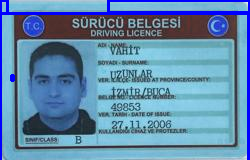

In [63]:
#Display original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


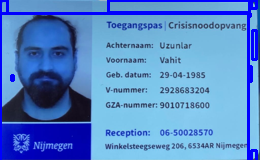

In [64]:
#Display tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


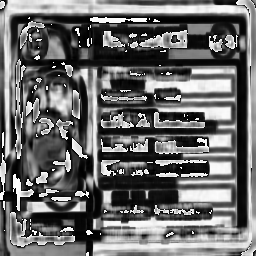

In [65]:
# print difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


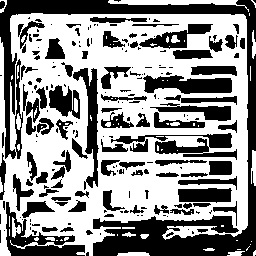

In [66]:
# Display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)